In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from metas_unclib import *

Definiciones

In [2]:
WD = np.array([9.234, 9.895, 10.116])
pixels = np.array([4443, 4598, 4645], dtype=float)
u_pixels = np.array([5, 5, 5])

Ajuste

In [3]:
from metas_unclib import *

WD_u = [ufloat(v) for v in WD]
pixels_u = [ufloat(v, u) for v, u in zip(pixels, u_pixels)]

model = unumlib.polyfit(WD_u, pixels_u, 1)  # Definir orden del ajuste

model_vals = unumlib.polyval(model, WD_u)
r2 = r2_score(pixels, get_value(model_vals))

print("Coeficientes:", model)
print("Coeficiente de determinación R^2:", r2)

Coeficientes: [230.28347231828184 ± 7.703907234392195
 2317.1199506839494 ± 75.15571660244272]
Coeficiente de determinación R^2: 0.9996400868977873


Gráfico

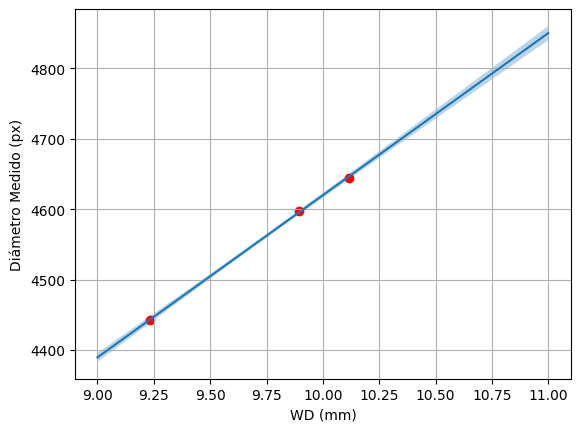

In [4]:
x = np.arange(9, 11.1, 0.1)
x2 = ufloatarray(x, np.zeros((len(x), len(x))) )
y = unumlib.polyval(model, x2)

mens = np.array(get_value(y))
unc = np.array(get_stdunc(y))

fig, ax = plt.subplots()
ax.plot(x, mens)
ax.fill_between(x, mens-unc, mens+unc ,alpha=0.3)
ax.scatter(WD, pixels, c='r')
ax.set_xlabel('WD (mm)') 
ax.set_ylabel('Diámetro Medido (px)') 
ax.grid()

Evaluar en WD del patron

In [14]:
# Definir
wd_pat = 11.198
peso_pixel = ufloat(0.2695, 1e-05)

diam_ajustado = unumlib.polyval(model, [wd_pat])
diam = peso_pixel * diam_ajustado[0]

print(diam_ajustado)
print("Diametro Linea: ", diam)

[4895.834273704069 ± 11.535152169226949]
Diametro Linea:  1319.4273367632468 ± 3.1091090007435773


Guardado

In [18]:
ustorage.save_binary_file(diam, "diam_ajustado.ufloat")

In [19]:
# Carga
ustorage.load_binary_file("diam_ajustado.ufloat")

1319.4273367632468 ± 3.1091090007435773